In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import netCDF4
import xarray as xr
import matplotlib

In [2]:
file = "/glade/derecho/scratch/kristenk/RVCC_proc/SPuerto_Rico_bleaching_metrics.nc"
#nc1 = netCDF4.Dataset(fp1)
ds_SPR = xr.open_dataset(file)

In [3]:
file = "/glade/derecho/scratch/kristenk/RVCC_proc/NPuerto_Rico_bleaching_metrics.nc"
#nc1 = netCDF4.Dataset(fp1)
ds_NPR = xr.open_dataset(file)

In [4]:
ds_NPR = ds_NPR.isel(time=slice(50,601))

In [5]:
ds_SPR = ds_SPR.isel(time=slice(50,601))

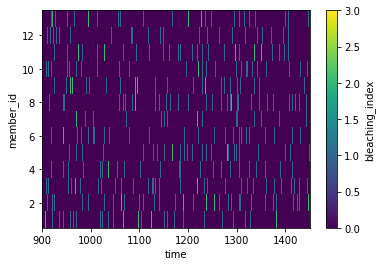

In [6]:
ds_NPR.bleaching_index.plot()

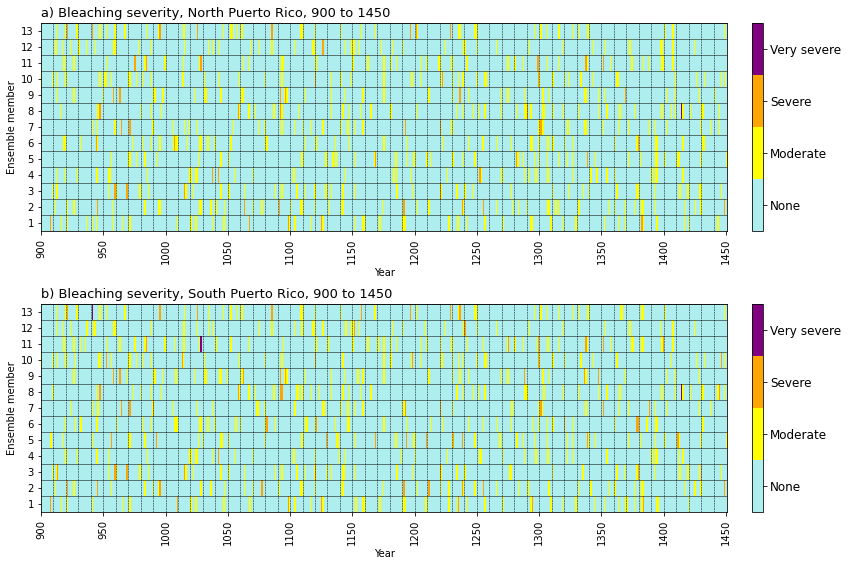

In [7]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(2,1,1)

ax.set_title('a) Bleaching severity, North Puerto Rico, 900 to 1450',loc='left', fontsize='13')

colorlist = ['paleturquoise', 'yellow', 'orange', 'purple']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('bleach', colorlist, N=4)

pc=ax.pcolormesh(ds_NPR.bleaching_index,cmap=cmap,vmin=0,vmax=4)
ax.set_ylabel('Ensemble member')
ax.set_xlabel('Year')

cbar = fig.colorbar(pc, ax=ax, ticks=[0.5,1.5,2.5,3.5], pad=0.03)
cbar.ax.set_yticklabels(['None', 'Moderate', 'Severe', 'Very severe'], fontsize=12) 

ax.set_yticks(ds_NPR.member_id.values-0.5)
ax.set_yticklabels(ds_NPR.member_id.values)

[ax.axhline(y=i, linewidth=0.5, color='black') for i in np.arange(1,14,1)]

[ax.axvline(x=i, linewidth=0.5, linestyle='--',color='black') for i in np.arange(10,550,10)]

ax.set_xticks(np.arange(0,600,50));
ax.set_xticklabels(np.arange(900,1500,50),rotation=90);

ax = fig.add_subplot(2,1,2)

ax.set_title('b) Bleaching severity, South Puerto Rico, 900 to 1450',loc='left', fontsize='13')

colorlist = ['paleturquoise', 'yellow', 'orange', 'purple']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('bleach', colorlist, N=4)

pc=ax.pcolormesh(ds_SPR.bleaching_index,cmap=cmap,vmin=0,vmax=4)
ax.set_ylabel('Ensemble member')
ax.set_xlabel('Year')

cbar = fig.colorbar(pc, ax=ax, ticks=[0.5,1.5,2.5,3.5], pad=0.03)
cbar.ax.set_yticklabels(['None', 'Moderate', 'Severe', 'Very severe'], fontsize=12) 

ax.set_yticks(ds_NPR.member_id.values-0.5)
ax.set_yticklabels(ds_NPR.member_id.values)

[ax.axhline(y=i, linewidth=0.5, color='black') for i in np.arange(1,14,1)]

[ax.axvline(x=i, linewidth=0.5, linestyle='--',color='black') for i in np.arange(10,550,10)]

ax.set_xticks(np.arange(0,600,50));
ax.set_xticklabels(np.arange(900,1500,50),rotation=90);

fig.subplots_adjust(hspace=0.35)

fig.savefig('/glade/work/kristenk/figs/PuertoRico-Coral_bleaching_NSheatmaps.png', bbox_inches='tight', dpi=300, format='png');

In [8]:
for ens in np.arange(0,13,1):
    #print(ens)
    unique, counts = np.unique(ds_SPR.bleaching_index.isel(member_id=ens).values, return_counts=True)
    bleach_dict = (dict(zip(unique, counts)))
    print('ens mem ', ens, 'had ', bleach_dict[2], ' severe bleaching events')

ens mem  0 had  7  severe bleaching events
ens mem  1 had  9  severe bleaching events
ens mem  2 had  9  severe bleaching events
ens mem  3 had  1  severe bleaching events
ens mem  4 had  10  severe bleaching events
ens mem  5 had  5  severe bleaching events
ens mem  6 had  8  severe bleaching events
ens mem  7 had  5  severe bleaching events
ens mem  8 had  8  severe bleaching events
ens mem  9 had  6  severe bleaching events
ens mem  10 had  6  severe bleaching events
ens mem  11 had  2  severe bleaching events
ens mem  12 had  8  severe bleaching events


In [9]:
bleach_dict[3]

1

In [10]:
unique, counts = np.unique(ds_SPR.bleaching_index.values, return_counts=True)
dict(zip(unique, counts))

{0: 6536, 1: 540, 2: 84, 3: 3}

In [11]:
unique, counts = np.unique(ds_NPR.bleaching_index.values, return_counts=True)
dict(zip(unique, counts))

{0: 6522, 1: 580, 2: 60, 3: 1}

In [12]:
total_yrs = 7150

In [13]:
579/total_yrs

0.08097902097902097

In [14]:
60/total_yrs

0.008391608391608392

In [15]:
539/total_yrs

0.07538461538461538

In [16]:
61/total_yrs

0.008531468531468531

In [17]:
87/total_yrs

0.012167832167832168

In [18]:
spr_mean_val = ds_SPR.bleaching_index.mean(dim='member_id')
npr_mean_val = ds_NPR.bleaching_index.mean(dim='member_id')

In [19]:
spr_mean_val.time

<xarray.DataArray 'time' (time: 551)>
array([ 900,  901,  902, ..., 1448, 1449, 1450])
Coordinates:
  * time     (time) int64 900 901 902 903 904 905 ... 1446 1447 1448 1449 1450

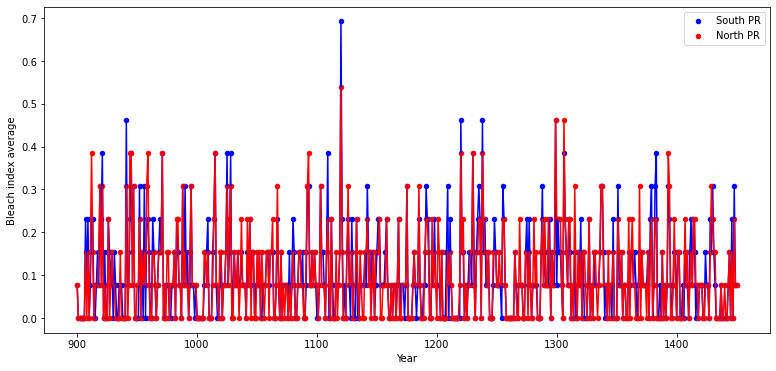

In [20]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1,1,1)

ax.set_ylabel('Bleach index average')
ax.set_xlabel('Year')
ax.scatter(spr_mean_val.time,spr_mean_val,s=20,color='blue',label='South PR')
ax.scatter(npr_mean_val.time,npr_mean_val,s=20,color='red',label='North PR')

ax.plot(spr_mean_val.time,spr_mean_val,color='blue')
ax.plot(npr_mean_val.time,npr_mean_val,color='red')
ax.legend()


In [21]:
start_i = 5
end_i = 545

moving_savg = np.full((end_i - start_i + 1),-99.)
moving_navg = np.full((end_i - start_i + 1),-99.)
moving_savg_dhm = np.full((end_i - start_i + 1),-99.)
moving_navg_dhm = np.full((end_i - start_i + 1),-99.)
time_center = np.full((end_i - start_i + 1),-99)

for ts in np.arange(start_i, end_i + 1,1):

    ### Do coral bleaching index
    savg = ds_SPR.bleaching_index.isel(time=slice(ts-5,ts+5)).mean(dim=('time','member_id')).values
    navg = ds_NPR.bleaching_index.isel(time=slice(ts-5,ts+5)).mean(dim=('time','member_id')).values
    #print('year =', ts+900, '   avg=', avg)

    moving_savg[ts-5] = savg
    moving_navg[ts-5] = navg


    ### Do DHM
    savg = ds_SPR.DHM_max.isel(time=slice(ts-5,ts+5)).mean(dim=('time','member_id')).values
    navg = ds_NPR.DHM_max.isel(time=slice(ts-5,ts+5)).mean(dim=('time','member_id')).values
    #print('year =', ts+900, '   avg=', avg)

    moving_savg_dhm[ts-5] = savg
    moving_navg_dhm[ts-5] = navg


    
    time_center[ts-5] = ts+900


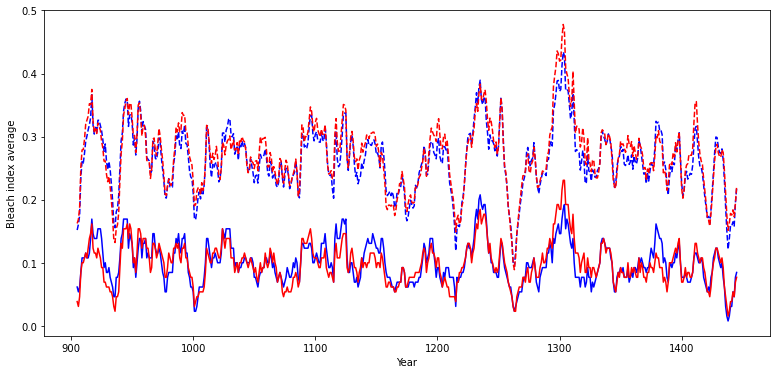

In [22]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1,1,1)

ax.set_ylabel('Bleach index average')
ax.set_xlabel('Year')
# ax.scatter(spr_mean_val.time,spr_mean_val,s=20,color='blue',label='South PR')
# ax.scatter(npr_mean_val.time,npr_mean_val,s=20,color='red')

ax.plot(time_center,moving_savg,color='blue')
ax.plot(time_center,moving_navg,color='red')

ax.plot(time_center,moving_savg_dhm,color='blue', linestyle='--')
ax.plot(time_center,moving_navg_dhm,color='red', linestyle='--')


#ax.plot(npr_mean_val.time,npr_mean_val,color='red')

In [23]:
start_i = 5
end_i = 545

moving_savg = np.full((end_i - start_i + 1,13),-99.)
moving_navg = np.full((end_i - start_i + 1,13),-99.)

moving_savg_dhm = np.full((end_i - start_i + 1,13),-99.)
moving_navg_dhm = np.full((end_i - start_i + 1,13),-99.)

time_center = np.full((end_i - start_i + 1),-99)

for ts in np.arange(start_i, end_i + 1,1):

    for em in np.arange(0,13,1):
    
        savg = ds_SPR.bleaching_index.isel(member_id=em,time=slice(ts-5,ts+5)).mean(dim='time').values
        navg = ds_NPR.bleaching_index.isel(member_id=em,time=slice(ts-5,ts+5)).mean(dim='time').values
        #print('year =', ts+900, '   avg=', avg)
    
        moving_savg[ts-5,em] = savg
        moving_navg[ts-5,em] = navg

        savg = ds_SPR.DHM_max.isel(member_id=em,time=slice(ts-5,ts+5)).mean(dim='time').values
        navg = ds_NPR.DHM_max.isel(member_id=em,time=slice(ts-5,ts+5)).mean(dim='time').values
        #print('year =', ts+900, '   avg=', avg)
    
        moving_savg_dhm[ts-5,em] = savg
        moving_navg_dhm[ts-5,em] = navg
        
        time_center[ts-5] = ts+900

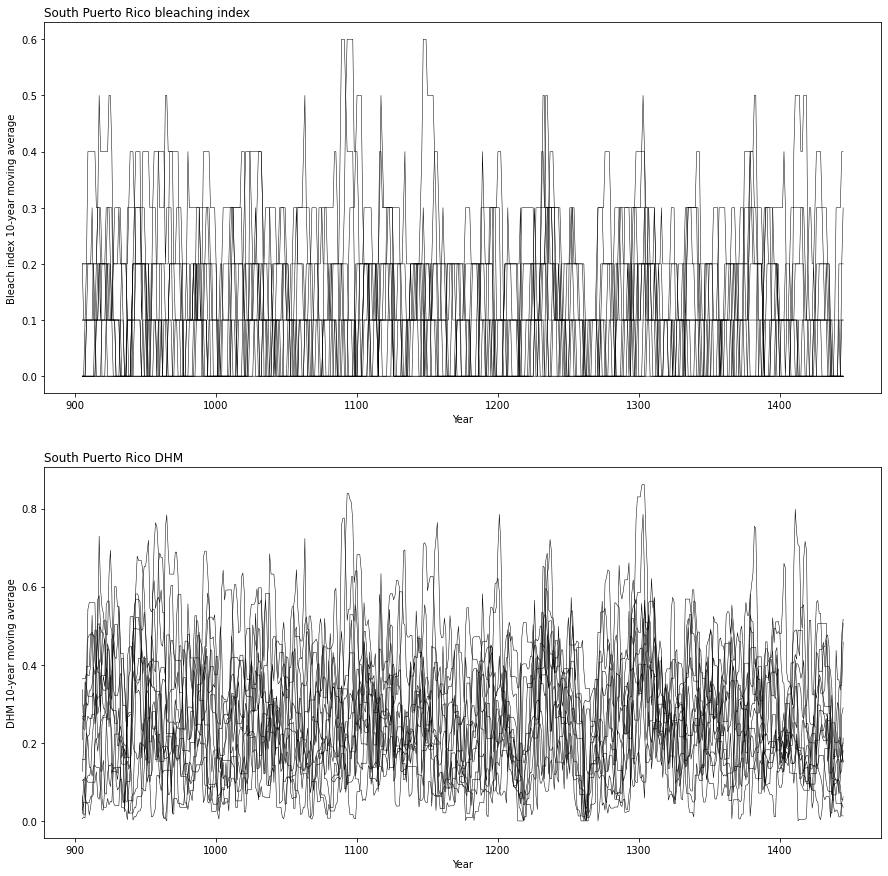

In [24]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2,1,1)
ax.set_title('South Puerto Rico bleaching index', loc='left')
ax.set_ylabel('Bleach index 10-year moving average')
ax.set_xlabel('Year')
for em in np.arange(0,13,1):
    ax.plot(time_center,moving_savg[:,em],color='black',linewidth=0.5)
    #ax.plot(time_center,moving_navg[:,em],color='red')
#ax.plot(npr_mean_val.time,npr_mean_val,color='red')


ax = fig.add_subplot(2,1,2)
ax.set_title('South Puerto Rico DHM', loc='left')
ax.set_ylabel('DHM 10-year moving average')
ax.set_xlabel('Year')
for em in np.arange(0,13,1):
    ax.plot(time_center,moving_savg_dhm[:,em],color='black',linewidth=0.5)
    #ax.plot(time_center,moving_navg[:,em],color='red')
#ax.plot(npr_mean_val.time,npr_mean_val,color='red')

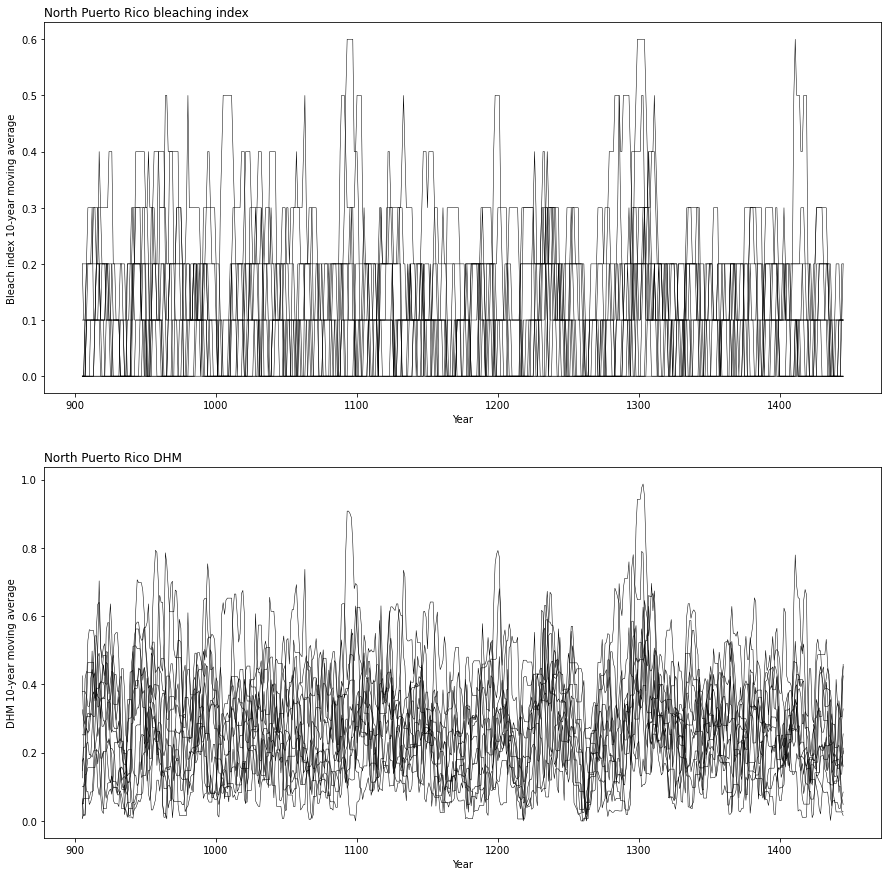

In [25]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2,1,1)
ax.set_title('North Puerto Rico bleaching index', loc='left')
ax.set_ylabel('Bleach index 10-year moving average')
ax.set_xlabel('Year')
for em in np.arange(0,13,1):
    ax.plot(time_center,moving_navg[:,em],color='black',linewidth=0.5)
    #ax.plot(time_center,moving_navg[:,em],color='red')
#ax.plot(npr_mean_val.time,npr_mean_val,color='red')

ax = fig.add_subplot(2,1,2)
ax.set_title('North Puerto Rico DHM', loc='left')
ax.set_ylabel('DHM 10-year moving average')
ax.set_xlabel('Year')
for em in np.arange(0,13,1):
    ax.plot(time_center,moving_navg_dhm[:,em],color='black',linewidth=0.5)
    #ax.plot(time_center,moving_navg[:,em],color='red')
#ax.plot(npr_mean_val.time,npr_mean_val,color='red')

In [26]:
moving_savg = xr.DataArray(moving_savg,dims=('time','member_id'))
moving_navg = xr.DataArray(moving_navg,dims=('time','member_id'))


moving_savg_dhm = xr.DataArray(moving_savg_dhm,dims=('time','member_id'))
moving_navg_dhm = xr.DataArray(moving_navg_dhm,dims=('time','member_id'))

In [27]:
moving_savg_ensmax = moving_savg.max(dim='member_id')
moving_navg_ensmax = moving_navg.max(dim='member_id')

moving_savg_dhm_ensmax = moving_savg_dhm.max(dim='member_id')
moving_navg_dhm_ensmax = moving_navg_dhm.max(dim='member_id')

In [28]:
moving_savg_ensmin = moving_savg.min(dim='member_id')
moving_navg_ensmin = moving_navg.min(dim='member_id')

moving_savg_dhm_ensmin = moving_savg_dhm.min(dim='member_id')
moving_navg_dhm_ensmin = moving_navg_dhm.min(dim='member_id')

In [29]:
moving_savg_ensmean = moving_savg.mean(dim='member_id')
moving_navg_ensmean = moving_navg.mean(dim='member_id')

moving_savg_dhm_ensmean = moving_savg_dhm.mean(dim='member_id')
moving_navg_dhm_ensmean = moving_navg_dhm.mean(dim='member_id')

In [30]:
moving_savg_ensstd = moving_savg.std(dim='member_id')
moving_navg_ensstd = moving_navg.std(dim='member_id')

moving_savg_dhm_ensstd = moving_savg_dhm.std(dim='member_id')
moving_navg_dhm_ensstd = moving_navg_dhm.std(dim='member_id')

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  
/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


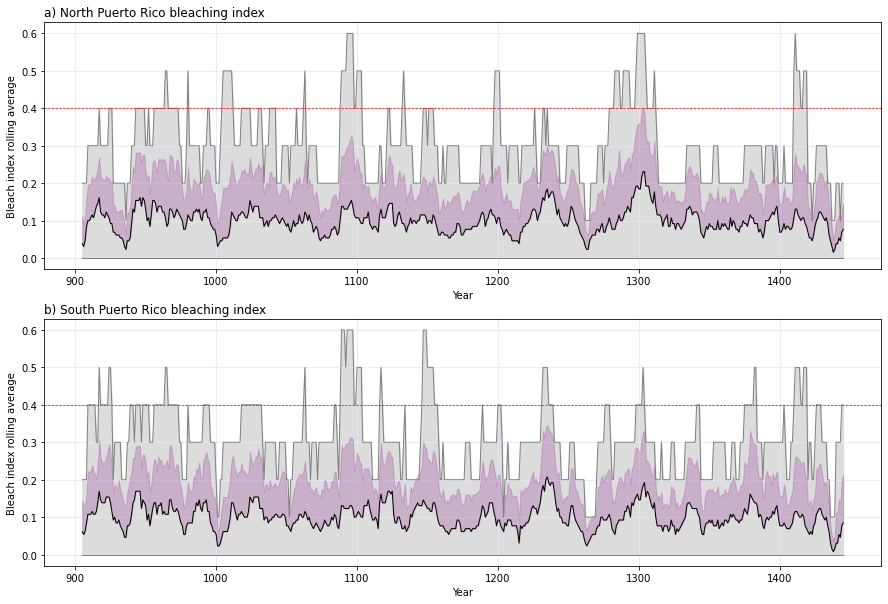

In [31]:
fig = plt.figure(figsize=(15,10))

##################################
ax = fig.add_subplot(2,1,1)
ax.set_title('a) North Puerto Rico bleaching index', loc='left')
ax.set_ylabel('Bleach index rolling average')
ax.set_xlabel('Year')

ax.plot(time_center,moving_navg_ensmean,color='black',linewidth=1,zorder=3)
ax.plot(time_center,moving_navg_ensmax,color='gray',linewidth=1,zorder=2)
ax.plot(time_center,moving_navg_ensmin,color='gray',linewidth=1,zorder=2);
ax.fill_between(time_center,moving_navg_ensmean,moving_navg_ensmean+ moving_navg_ensstd,color='purple',alpha=0.2,zorder=2)
ax.xaxis.grid(True, which='major',color='lavender',zorder=0)
ax.yaxis.grid(False, which='major',color='lavender',zorder=0)
ax.axhline(0.4,color='red',linewidth=0.7,linestyle='--')

ax.fill_between(time_center, moving_navg_ensmin, moving_navg_ensmax, color='gainsboro', zorder=1);




ax = fig.add_subplot(2,1,2)

ax.set_ylabel('Bleach index rolling average')
ax.set_xlabel('Year')
ax.set_title('b) South Puerto Rico bleaching index', loc='left')
ax.plot(time_center,moving_savg_ensmean,color='black',linewidth=1,zorder=3)
ax.plot(time_center,moving_savg_ensmax,color='gray',linewidth=1,zorder=2)
ax.plot(time_center,moving_savg_ensmin,color='gray',linewidth=1,zorder=2);
ax.fill_between(time_center,moving_savg_ensmean,moving_savg_ensmean+ moving_savg_ensstd,color='purple',alpha=0.2,zorder=2)
ax.xaxis.grid(True, which='major',color='lavender',zorder=0)
ax.yaxis.grid(False, which='major',color='lavender',zorder=0)
ax.axhline(0.4,color='red',linewidth=0.7,linestyle='--')

ax.fill_between(time_center, moving_savg_ensmin, moving_savg_ensmax, color='gainsboro', zorder=1);


fig.savefig('/glade/work/kristenk/figs/PuertoRico-Coral_bleaching_lineplots.png', bbox_inches='tight', dpi=300, format='png');

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  
/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


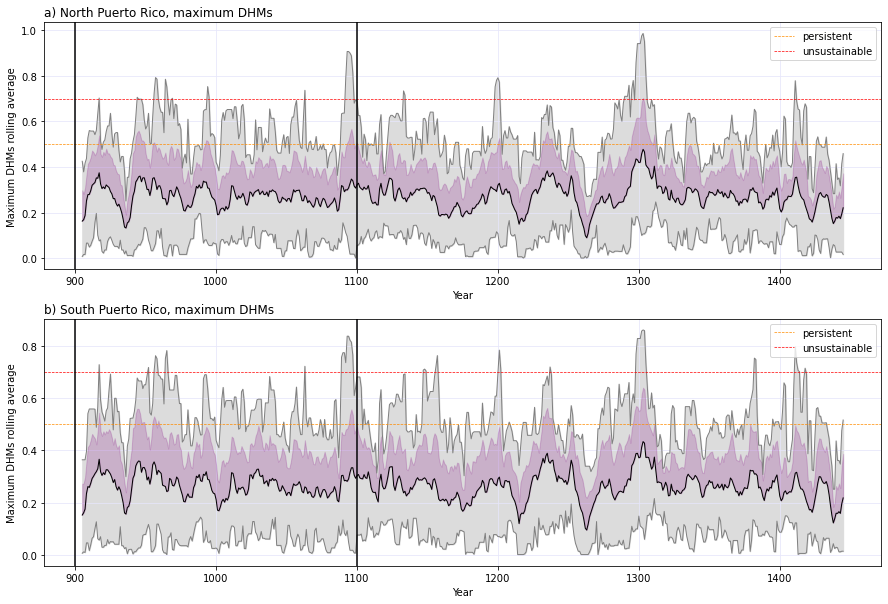

In [36]:
fig = plt.figure(figsize=(15,10))

##################################
ax = fig.add_subplot(2,1,1)
ax.set_title('a) North Puerto Rico, maximum DHMs', loc='left')
ax.set_ylabel('Maximum DHMs rolling average')
ax.set_xlabel('Year')

ax.plot(time_center,moving_navg_dhm_ensmean,color='black',linewidth=1,zorder=3)
ax.plot(time_center,moving_navg_dhm_ensmax,color='gray',linewidth=1,zorder=2)
ax.plot(time_center,moving_navg_dhm_ensmin,color='gray',linewidth=1,zorder=2);
ax.fill_between(time_center,moving_navg_dhm_ensmean,moving_navg_dhm_ensmean+ moving_navg_dhm_ensstd,color='purple',alpha=0.2,zorder=2)
ax.xaxis.grid(True, which='major',color='lavender',zorder=0)
ax.yaxis.grid(False, which='major',color='lavender',zorder=0)
ax.axhline(0.5,color='darkorange',linewidth=0.7,linestyle='--', label='persistent')
ax.axhline(0.7,color='red',linewidth=0.7,linestyle='--', label='unsustainable')
ax.fill_between(time_center, moving_navg_dhm_ensmin, moving_navg_dhm_ensmax, color='gainsboro', zorder=1);
ax.axvline(900, color='black')
ax.axvline(1100, color='black')
ax.legend()


ax = fig.add_subplot(2,1,2)

ax.set_ylabel('Maximum DHMs rolling average')
ax.set_xlabel('Year')
ax.set_title('b) South Puerto Rico, maximum DHMs', loc='left')
ax.plot(time_center,moving_savg_dhm_ensmean,color='black',linewidth=1,zorder=3)
ax.plot(time_center,moving_savg_dhm_ensmax,color='gray',linewidth=1,zorder=2)
ax.plot(time_center,moving_savg_dhm_ensmin,color='gray',linewidth=1,zorder=2);
ax.fill_between(time_center,moving_savg_dhm_ensmean,moving_savg_dhm_ensmean+ moving_savg_dhm_ensstd,color='purple',alpha=0.2,zorder=2)
ax.xaxis.grid(True, which='major',color='lavender',zorder=0)
ax.yaxis.grid(False, which='major',color='lavender',zorder=0)
ax.axhline(0.5,color='darkorange',linewidth=0.7,linestyle='--', label='persistent')
ax.axhline(0.7,color='red',linewidth=0.7,linestyle='--', label='unsustainable')
ax.fill_between(time_center, moving_savg_dhm_ensmin, moving_savg_dhm_ensmax, color='gainsboro', zorder=1);
ax.axvline(900, color='black')
ax.axvline(1100, color='black')
ax.legend()
fig.savefig('/glade/work/kristenk/figs/PuertoRico-Coral_DHMs_lineplots.png', bbox_inches='tight', dpi=300, format='png');